**tudi Kasus 4: Membuat Kode yang Reusable (Functions)**

**Skenario & Data Awal:**

**Bos Anda sangat senang dengan laporan Pandas Anda. Tapi bulan depan, dia akan memberi Anda file data baru. Dia tidak mau Anda copy-paste kode yang sama berulang-ulang.**

**Dia ingin Anda membuat "alat" (sebuah function) yang bisa dia panggil kapan saja.**

----

In [37]:
# Data Awal Anda (Sama seperti kemarin)
import pandas as pd
import numpy as np

data_mahasiswa = [
    {'id': 'M001', 'nama': 'Budi', 'nilai_uts': 85, 'nilai_uas': 90},
    {'id': 'M002', 'nama': 'Ani', 'nilai_uts': 70, 'nilai_uas': 85},
    {'id': 'M003', 'nama': 'Candra', 'nilai_uts': 90, 'nilai_uas': 'BELUM_UJIAN'},
    {'id': 'M004', 'nama': 'Dewi', 'nilai_uts': 50, 'nilai_uas': 65}
]

----

**Membuat "Pembungkus" Fungsi**

**Tugas: Buatlah sebuah fungsi Python dengan nama buat_laporan_kelulusan.**
- Input: Fungsi ini harus menerima satu argumen: `data_mentah_list` (yang kita harapkan adalah format list-of-dictionary).
- Output: Fungsi ini harus mengembalikan (return) sebuah DataFrame Pandas yang sudah lengkap dan bersih.



In [38]:
def buat_laporan_kelulusan(data_mentah_list):
    # 1. Konversi list ke DataFrame
    df = pd.DataFrame(data_mentah_list)

    # 2. Ambil kode pembersihan Anda dari kemarin
    df['nilai_uas'] = pd.to_numeric(df['nilai_uas'], errors='coerce')
    df['nilai_uas'] = pd.to_numeric(df['nilai_uas'], errors='coerce')
    
    # 3. Ambil kode kalkulasi Anda dari kemarin
    df['nilai_akhir'] = (df['nilai_uts'] * 0.4) + (df['nilai_uas'] * 0.6)

    # 4. Ambil kode np.where Anda dari kemarin
    df['mahasiswa_lulus'] = np.where(df['nilai_akhir'] > 70, 'LULUS', 'TIDAK LULUS')

    # 5. Kembalikan hasilnya!
    return df


# print(buat_laporan_kelulusan(data_mahasiswa))
laporan_final = buat_laporan_kelulusan(data_mahasiswa)

print(laporan_final)

     id    nama  nilai_uts  nilai_uas  nilai_akhir mahasiswa_lulus
0  M001    Budi         85       90.0         88.0           LULUS
1  M002     Ani         70       85.0         79.0           LULUS
2  M003  Candra         90        NaN          NaN     TIDAK LULUS
3  M004    Dewi         50       65.0         59.0     TIDAK LULUS


In [39]:
data_semester_depan = [
    {'id': 'M005', 'nama': 'Eko', 'nilai_uts': 95, 'nilai_uas': 88},
    {'id': 'M006', 'nama': 'Fani', 'nilai_uts': 60, 'nilai_uas': 'MENGULANG'}
]

In [40]:
laporan_semester_depan = buat_laporan_kelulusan(data_semester_depan)
print(laporan_semester_depan)

     id  nama  nilai_uts  nilai_uas  nilai_akhir mahasiswa_lulus
0  M005   Eko         95       88.0         90.8           LULUS
1  M006  Fani         60        NaN          NaN     TIDAK LULUS


---
**5: Visualisasi Laporan Mahasiswa**

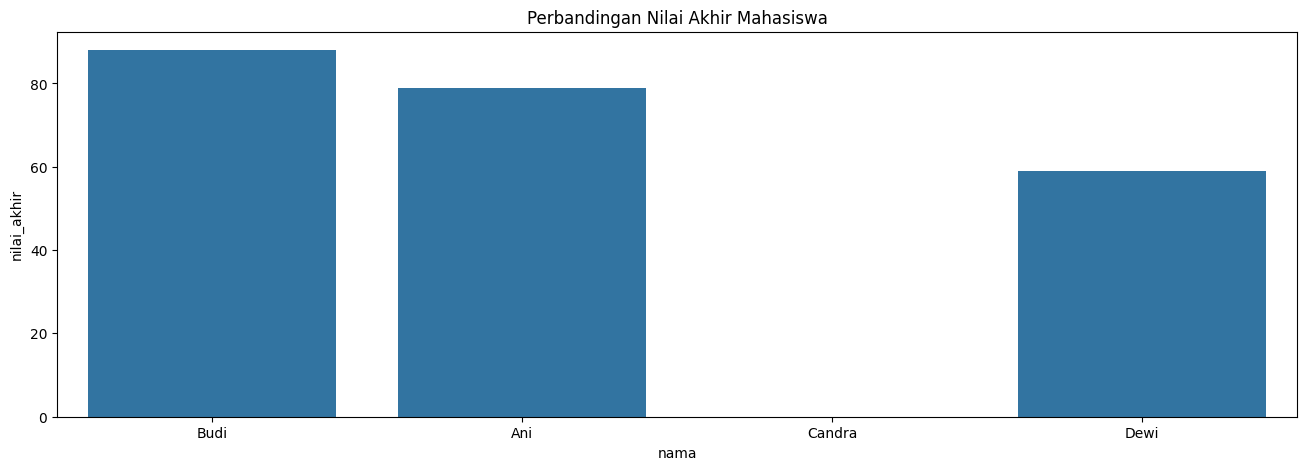

In [41]:
# (Bar Chart): Perbandingan Nilai Akhir
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
sns.barplot(data=laporan_final,
             x='nama', 
             y='nilai_akhir')

plt.title('Perbandingan Nilai Akhir Mahasiswa')
plt.show()

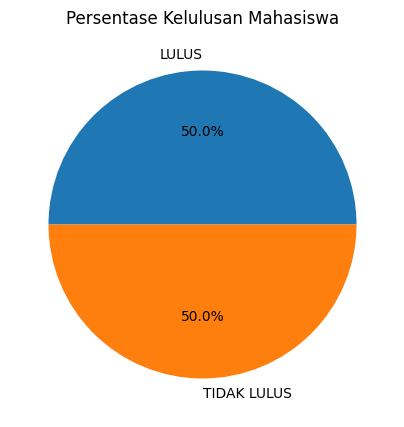

In [42]:
# (Pie Chart): Persentase Kelulusan
plt.figure(figsize=(16, 5))
data_pie = laporan_final['mahasiswa_lulus'].value_counts()
plt.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%') # autopct='%1.1f%%' adalah kode ajaib untuk menampilkan persentase secara otomatis
plt.title('Persentase Kelulusan Mahasiswa')
plt.show()


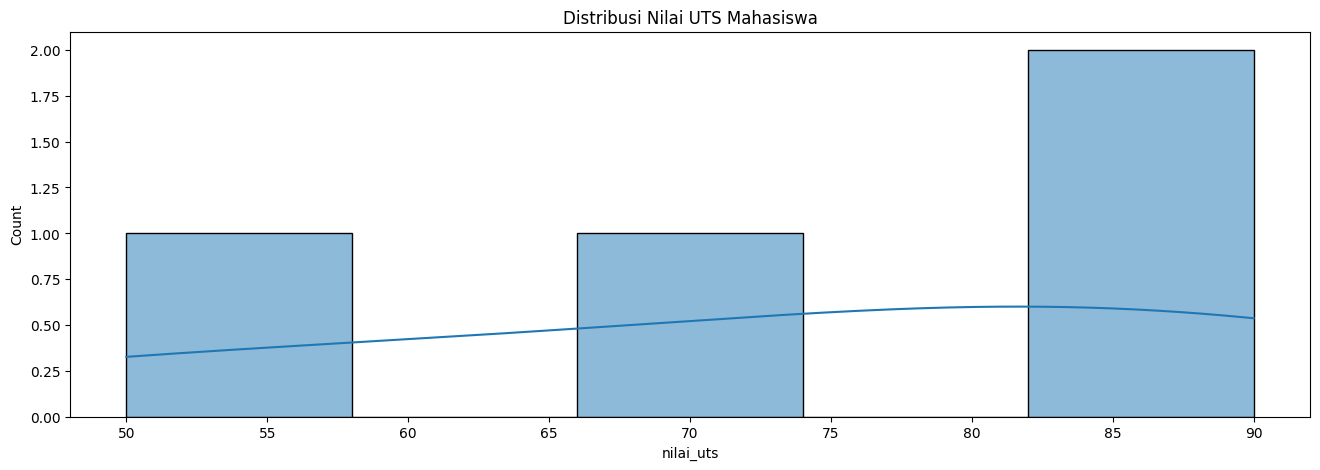

In [43]:
# Histogram: Distribusi Nilai UTS
plt.figure(figsize=(16, 5))
sns.histplot(data=laporan_final, x='nilai_uts', bins=5, kde=True)
plt.title('Distribusi Nilai UTS Mahasiswa')
plt.show()

In [44]:
# additional edits below

import pandas as pd
import numpy as np

def buat_laporan_kelulusan(data_mentah_list):
    """
    Versi robust (v2) - bisa menangani kolom hilang, nilai aneh, dan data tidak lengkap.
    """
    # 1. Validasi input
    if not isinstance(data_mentah_list, list):
        raise TypeError("❌ Input harus berupa list of dict!")
    if len(data_mentah_list) == 0:
        return pd.DataFrame(), "⚠️ Data kosong."

    # 2. Konversi list ke DataFrame
    df = pd.DataFrame(data_mentah_list)

    # 3. Pastikan kolom identitas ada
    kolom_identitas = ['id', 'nama']
    for kolom in kolom_identitas:
        if kolom not in df.columns:
            print(f"⚠️ Kolom '{kolom}' hilang, diisi dengan 'TIDAK DIKETAHUI'")
            df[kolom] = 'TIDAK DIKETAHUI'

    # Isi nilai kosong di kolom identitas
    df['id'] = df['id'].fillna('TIDAK DIKETAHUI')
    df['nama'] = df['nama'].fillna('TIDAK DIKETAHUI')

    # 4. Pastikan kolom nilai ada
    kolom_nilai = ['nilai_uts', 'nilai_uas']
    for kolom in kolom_nilai:
        if kolom not in df.columns:
            print(f"⚠️ Kolom '{kolom}' hilang, diisi dengan 0")
            df[kolom] = 0

    # 5. Konversi ke numerik (BELUM_UJIAN → NaN → 0)
    df['nilai_uts'] = pd.to_numeric(df['nilai_uts'], errors='coerce').fillna(0)
    df['nilai_uas'] = pd.to_numeric(df['nilai_uas'], errors='coerce').fillna(0)

    # 6. Hitung nilai akhir
    df['nilai_akhir'] = (df['nilai_uts'] * 0.4) + (df['nilai_uas'] * 0.6)

    # 7. Tentukan kelulusan
    df['mahasiswa_lulus'] = np.where(df['nilai_akhir'] >= 70, 'LULUS', 'TIDAK LULUS')

    # 📊8. Ringkasan hasil
    total = len(df)
    total_lulus = (df['mahasiswa_lulus'] == 'LULUS').sum()
    ringkasan = f"✅ Total mahasiswa: {total}, Lulus: {total_lulus}, Tidak Lulus: {total - total_lulus}"

    return df, ringkasan


data_semester_baru = [
    {'id': 'M008', 'nilai_uts': 80, 'nilai_uas': 90},   # kolom nama hilang
    {'nama': 'Hani', 'nilai_uts': 85, 'nilai_uas': 95}, # kolom id hilang
    {'id': None, 'nama': None, 'nilai_uts': 70, 'nilai_uas': 'BELUM_UJIAN'} # kosong total
]

df, ringkasan = buat_laporan_kelulusan(data_semester_baru)
df



,id,nilai_uts,nilai_uas,nama,nilai_akhir,mahasiswa_lulus
0,M008,80,90.0,TIDAK DIKETAHUI,86.0,LULUS
1,TIDAK DIKETAHUI,85,95.0,Hani,91.0,LULUS
2,TIDAK DIKETAHUI,70,0.0,TIDAK DIKETAHUI,28.0,TIDAK LULUS


In [45]:
print(ringkasan)

✅ Total mahasiswa: 3, Lulus: 2, Tidak Lulus: 1
